# <center style="color:green;font-weight:bold;"> Gyalpozhing College of Information Technology </center>

# <center style="color:green;font-weight:bold;"> Practical 10 - Evaluation Metrics </center>

## <center style="color:red;font-weight:bold;"> CAE407 Data Science </center>

### <center style="color:red;"> Autumn Semester, 2022 </center>

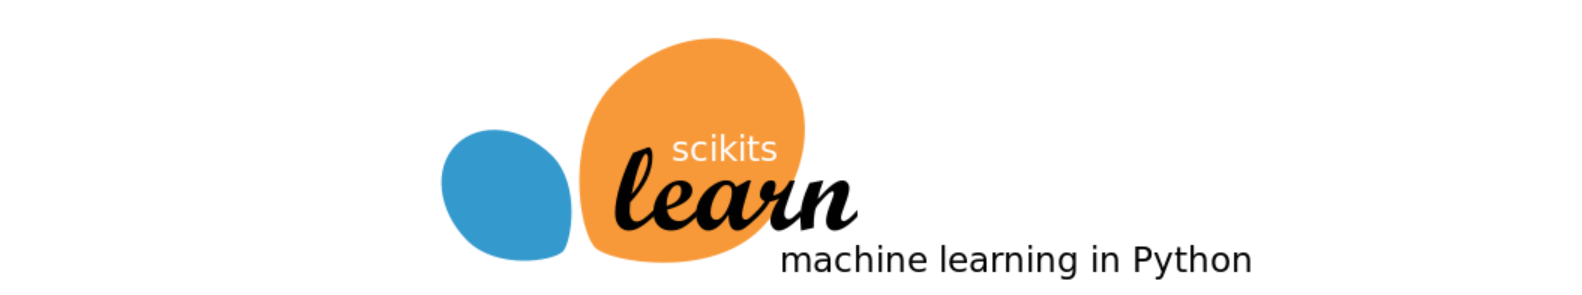

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [2]:
columns = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense",
           "Citizen", "ZipCode", "Income", "ApprovalStatus"]

df = pd.read_csv("credictcard.csv", names = columns)
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## 2.2.  Print summary of the dataset

In [3]:
# Provide statistical summary of the dataframe
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
# Provide concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## 2.3. Check null values for all the colums in the dataset

In [5]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [6]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [7]:
# replace all the "?" in the dataframe with np.nan
df = df.replace("?", np.nan)

In [8]:
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [9]:
# Check the datatypes of all the columns
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [10]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [11]:
# Convert columns into reasonable format
# convert "Age" and "ZipCode" to float
df[["Age", "ZipCode"]] = df[["Age", "ZipCode"]].astype('float')

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [12]:
# Store all the categorical data together
categorical_features = df.select_dtypes(include=["object", "bool"])

# Store all the numberical data together
numberical_features = df.select_dtypes(include=["int", "float"])

In [13]:
# Missing values of categorical_features
categorical_features.isna().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

In [14]:
# Missing values of categorical_features
numberical_features.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [15]:
from sklearn.impute import SimpleImputer

impute_cat = SimpleImputer(strategy="most_frequent")

cat_cols = categorical_features.columns
data = impute_cat.fit_transform(categorical_features)

categorical_df = pd.DataFrame(data, columns=cat_cols)

# Separate target variable
target = categorical_df.ApprovalStatus

df_cat = categorical_df.drop("ApprovalStatus", axis=1)
df_cat.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [16]:
# Check the missing values
df_cat.isnull().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute numerical values with most mean/average values. 

- Check missing records after imputation

In [17]:
from sklearn.impute import SimpleImputer

impute_num = SimpleImputer(strategy="mean")

num_cols = numberical_features.columns
data = impute_num.fit_transform(numberical_features)

df_num = pd.DataFrame(data, columns=num_cols)

In [18]:
# Check missing values
df_num.isna().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaled = scaler.fit_transform(df_num)
scaled_numdf = pd.DataFrame(scaled, columns=num_cols)

In [20]:
# Display first rows
scaled_numdf.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000
1,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560
2,0.161654,0.017857,0.052632,0.000000,0.1400,0.00824
3,0.211729,0.055000,0.131579,0.074627,0.0500,0.00003
4,0.096541,0.200893,0.060000,0.000000,0.0600,0.00000


# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [21]:
from sklearn.preprocessing import OrdinalEncoder

# encode the categorical data
oe = OrdinalEncoder()

data = oe.fit_transform(df_cat)
encoded_catdf = pd.DataFrame(data, columns=df_cat.columns)
encoded_catdf.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen
0,1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0,2.0


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode Target variable
y = pd.DataFrame(le.fit_transform(target), columns=["ApprovalStatus"])
y.head()

,ApprovalStatus
0,0
1,0
2,0
3,0
4,0


In [23]:
# Concatenate Categorical and Numberical features
X = pd.concat([encoded_catdf, scaled_numdf], axis=1)
X.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000
1,0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560
2,0.0,1.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.161654,0.017857,0.052632,0.000000,0.1400,0.00824
3,1.0,1.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0,0.211729,0.055000,0.131579,0.074627,0.0500,0.00003
4,1.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0,2.0,0.096541,0.200893,0.060000,0.000000,0.0600,0.00000


# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the classes.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [25]:
print("X_train Size:", X_train.shape)
print("y_train Size:", y_train.shape)
print("X_test Size:", X_test.shape)
print("y_test Size:", y_test.shape)

X_train Size: (552, 15)
y_train Size: (552, 1)
X_test Size: (138, 15)
y_test Size: (138, 1)


## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [26]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Use K-Nearest Neighors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [28]:
# Use Suport Vector Machines algorithm
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train, y_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [29]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_recall_fscore_support

# function to print the score of the models
def scores(models):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        
        print(name + " Performance:")
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        print("Precision: \n", pd.DataFrame(precision_recall_fscore_support(y_test, y_pred)), "\n")
        print("Recall Score:", recall_score(y_test, y_pred))
        print("F1-Score:", f1_score(y_test, y_pred), "\n")
        
models = {"Logistic Regression":lr, "K-Nearest Neighbors":knn, "SVM":svm}
scores(models)


Logistic Regression Performance:
Accuracy Score: 0.8695652173913043
Precision: 
            0          1
0   0.815385   0.917808
1   0.898305   0.848101
2   0.854839   0.881579
3  59.000000  79.000000 

Recall Score: 0.8481012658227848
F1-Score: 0.881578947368421 

K-Nearest Neighbors Performance:
Accuracy Score: 0.8043478260869565
Precision: 
            0          1
0   0.785714   0.817073
1   0.745763   0.848101
2   0.765217   0.832298
3  59.000000  79.000000 

Recall Score: 0.8481012658227848
F1-Score: 0.8322981366459627 

SVM Performance:
Accuracy Score: 0.8623188405797102
Precision: 
            0          1
0   0.794118   0.928571
1   0.915254   0.822785
2   0.850394   0.872483
3  59.000000  79.000000 

Recall Score: 0.8227848101265823
F1-Score: 0.87248322147651 



In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, color):
    
    plt.figure(figsize=(14, 12))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=color)

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    
    plt.show()


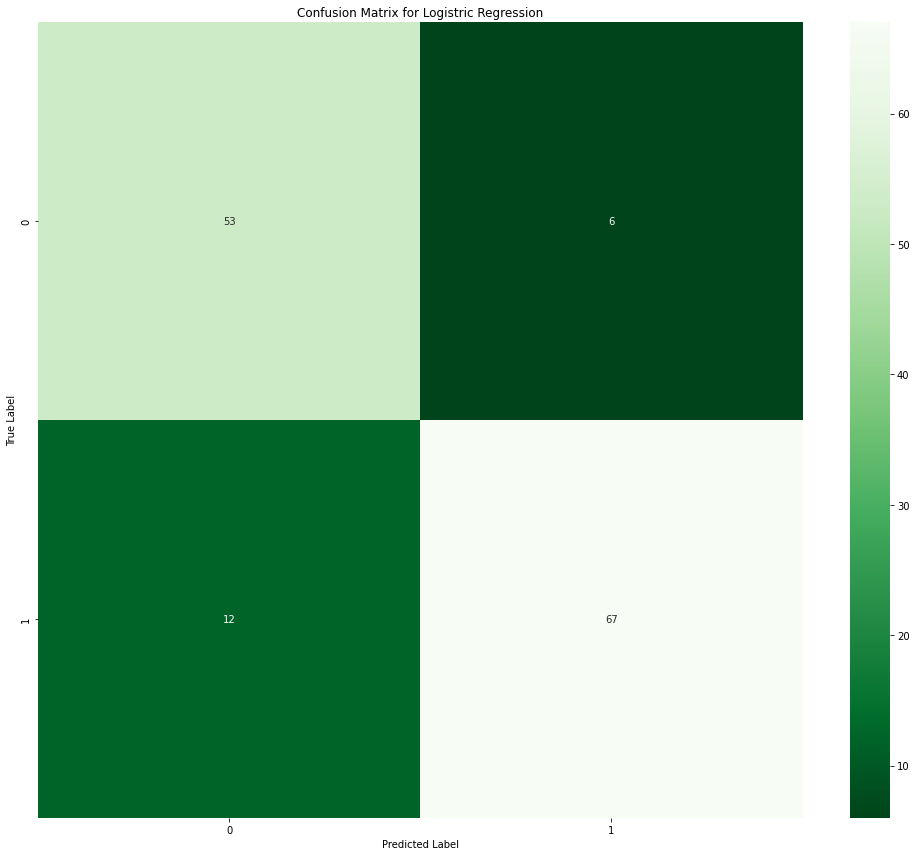

In [31]:
# confusion matrix for Logistric Regression
lr_pred = lr.predict(X_test)

plot_confusion_matrix(y_test, lr_pred, "Confusion Matrix for Logistric Regression", "Greens_r")

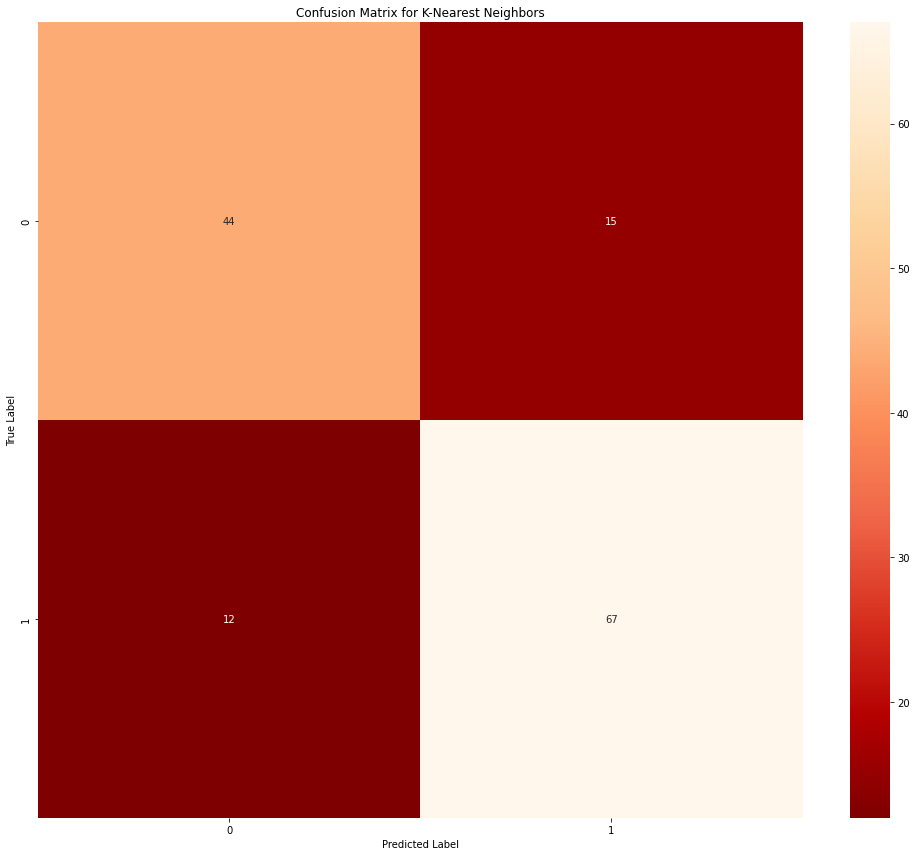

In [32]:
# Confustion matrix for K-Nearest Neighbors
knn_pred = knn.predict(X_test)

plot_confusion_matrix(y_test, knn_pred, "Confusion Matrix for K-Nearest Neighbors", "OrRd_r")

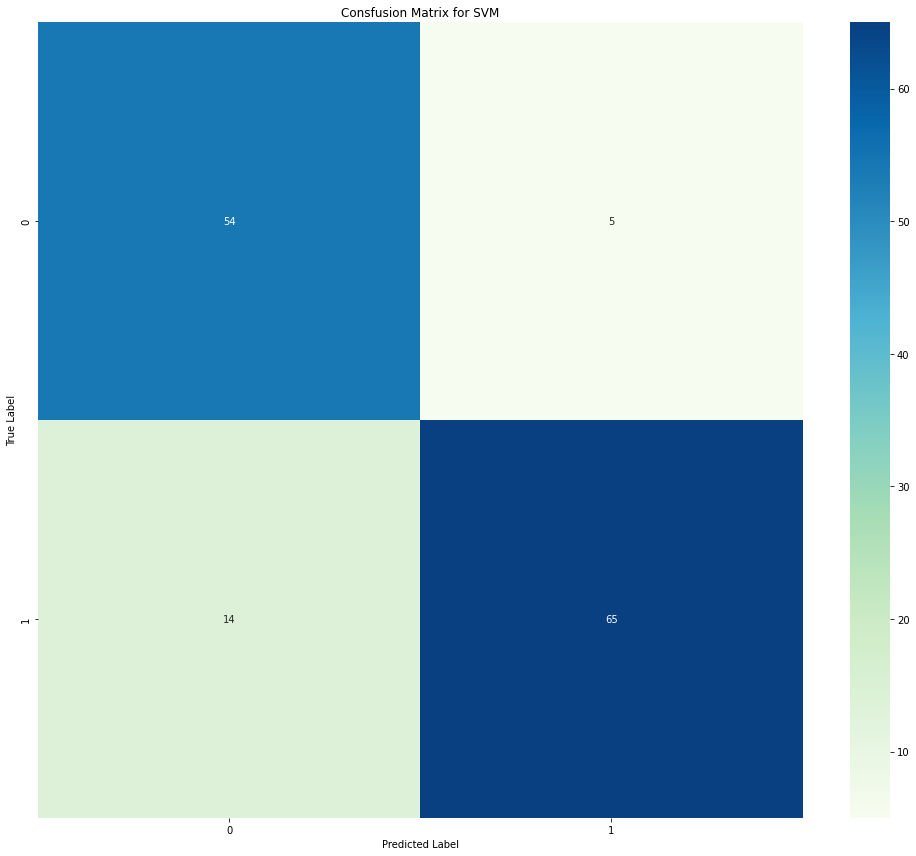

In [33]:
# Confustion matrix for Support Vector Machines(SVM)
svm_pred = svm.predict(X_test)

plot_confusion_matrix(y_test, svm_pred, "Consfusion Matrix for SVM", "GnBu")

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [34]:
# Use Logistic Regression for Prediction
lr_pred = lr.predict(X_test)

# Compare Actual and Predicted labels
print("Actual Labels:", y_test.ApprovalStatus.values[:20])
print("Predicted Labels:", lr_pred[:20])

Actual Labels: [0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1]
Predicted Labels: [1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1]


In [35]:
# Use K-Nearest Neighbors for Prediction
kn_pred = knn.predict(X_test)

# Compare Actual and Predicted labels
print("Actual Labels:", y_test.ApprovalStatus.values[:20])
print("Predicted Labels:", kn_pred[:20])

Actual Labels: [0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1]
Predicted Labels: [1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1]


In [36]:
# Use Support Vector Machines(SVM) for prediction
svm_pred = svm.predict(X_test)

# Compare Actual and Predicted Labels
print("Actual Labels:", y_test.ApprovalStatus.values[:20])
print("Predicted Labels:", svm_pred[:20])

Actual Labels: [0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1]
Predicted Labels: [0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1]


# 9. Improve your model

- Use any technique to improve your model.

--> `Feature Selection - ` - to select only the optimal features for better performance

In [137]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
fs = SelectKBest(score_func=chi2, k=12)

X_selected = fs.fit_transform(X, y)

Split the dataset in training and testing sets

In [148]:
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(X_selected, y, test_size=0.2, random_state=111)

Fitting the models

In [149]:
lr_model = LogisticRegression()

knn_model = KNeighborsClassifier()

svm_model = SVC()

In [150]:
lr_model.fit(Xs_train, Ys_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [151]:
knn_model.fit(Xs_train, Ys_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [152]:
svm_model.fit(Xs_train, Ys_train)

c:\Users\asusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Confustion Matrix for Optimized Models

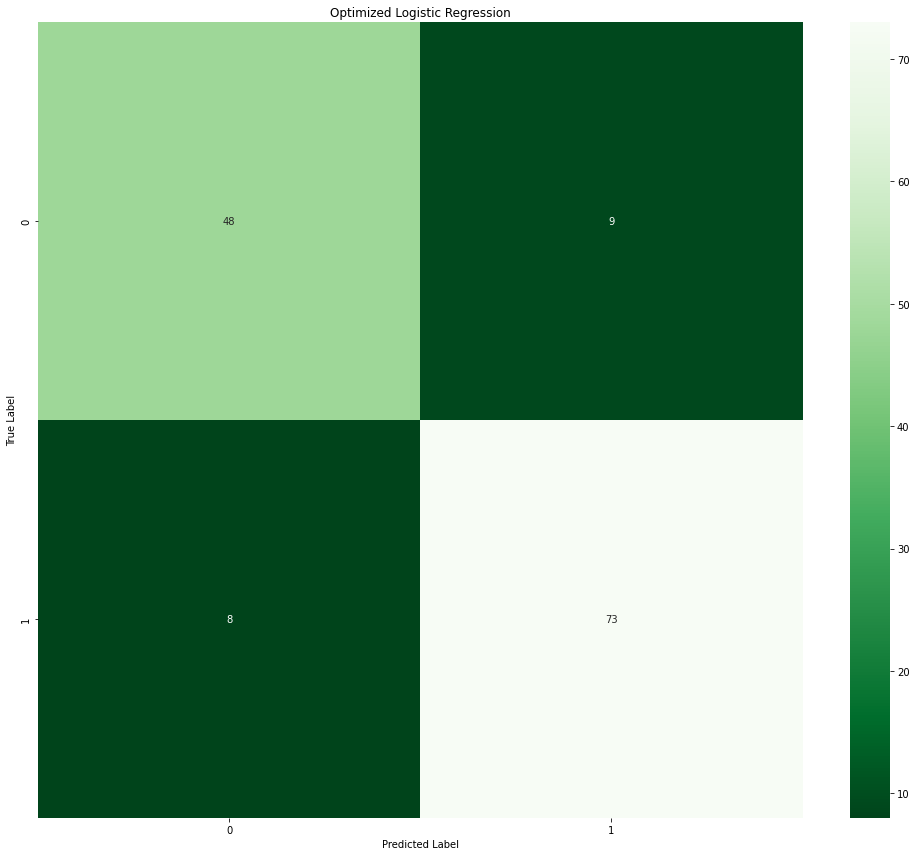

In [153]:
# Confustion matrix for optimized Logistic Regression
knn_prediction = knn_model.predict(Xs_test)

plot_confusion_matrix(Ys_test, knn_prediction, "Optimized Logistic Regression", "Greens_r")

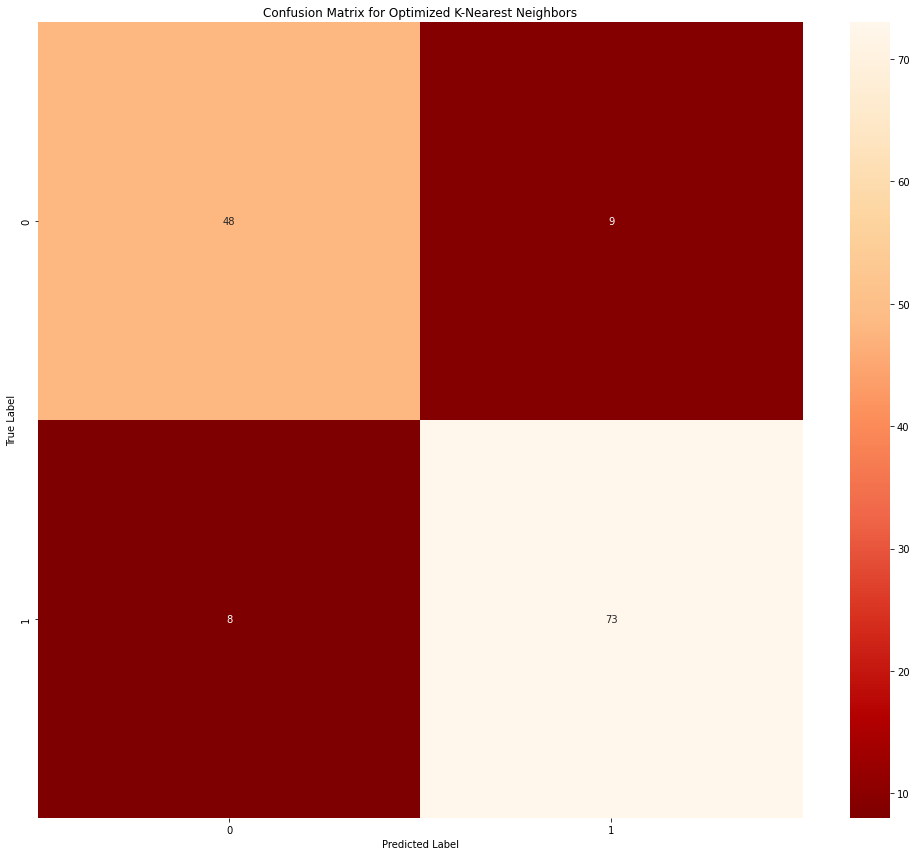

In [154]:
# Confustion matrix for Optimized K-Nearest Neighbors
knn_prediction = knn_model.predict(Xs_test)

plot_confusion_matrix(Ys_test, knn_prediction, "Confusion Matrix for Optimized K-Nearest Neighbors", "OrRd_r")


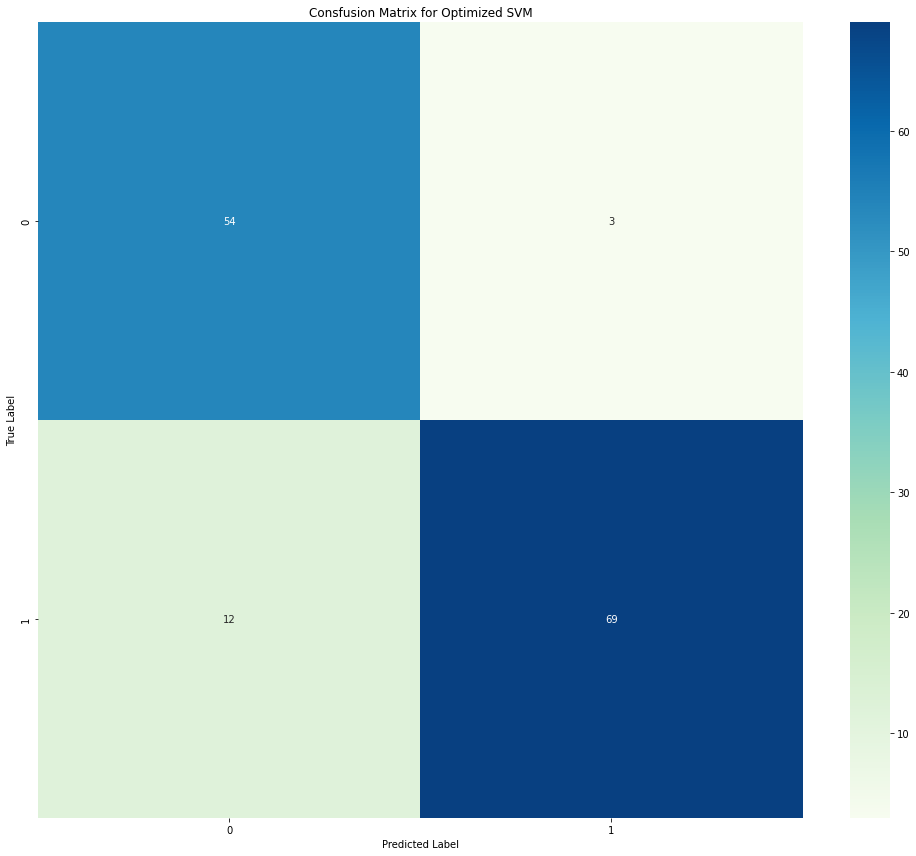

In [155]:
# Confustion matrix for Support Vector Machines(SVM)
svm_prediction = svm_model.predict(Xs_test)

plot_confusion_matrix(Ys_test, svm_prediction, "Consfusion Matrix for Optimized SVM", "GnBu")

Models Accuracy before performing `Feature Selection`

In [156]:
print("LogisticRegression Accuracy:", round(accuracy_score(lr.predict(X_test), y_test), 4))

print("K_Neighbors Accuracy:", round(accuracy_score(knn.predict(X_test), y_test), 4))

print("SVM Accuracy:", round(accuracy_score(svm.predict(X_test), y_test), 4))


LogisticRegression Accuracy: 0.8696
K_Neighbors Accuracy: 0.8043
SVM Accuracy: 0.8623


Model Accuracy after performing `Feature Selection`

In [157]:
print("LogisticRegression Accuracy:", round(accuracy_score(lr_model.predict(Xs_test), Ys_test), 4))

print("K_Neighbors Accuracy:", round(accuracy_score(knn_model.predict(Xs_test), Ys_test), 4))

print("SVM Accuracy:", round(accuracy_score(svm_model.predict(Xs_test), Ys_test), 4))

LogisticRegression Accuracy: 0.9203
K_Neighbors Accuracy: 0.8768
SVM Accuracy: 0.8913


### Conclustion:
* The performance of the models improved after performing `feature selection` compared to the models before performing feature selection.

# <center style="font-weight:bold; color:red;"> ~ ~ The End ~ ~ </center>